In [37]:
import pandas as pd
import shap
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [62]:
# !pip install shap
# !pip install interpret

In [63]:
data = pd.read_csv("dataset_for_models.csv", index_col=0)

In [64]:
columns = data.columns
data = data[columns[1:len(columns)]]

In [65]:
data = data.reset_index()

In [66]:
data

,index,WeightInit,Height,DateDiff,ObesityDegree,Age,Gender,Prothrombin time,Bilirubin total,Creatinine,Total cholesterol,Glucose (syv.),Potassium,AST,ALT,WBC- Leukocytes,HGB- Hemoglobin,HCT-Hematocrit,Target,TargetWeight
0,0,100.0,176.0,32,1.0,64.156164,-1,12.7,8.90,112.0,7.40,5.60,5.00,36.0,51.0,3.90,140.0,41.70,0,100.0
1,1,100.0,172.5,358,1.0,66.958904,-1,21.2,7.00,123.0,3.10,9.30,5.70,21.0,37.0,8.20,155.0,43.40,0,100.0
2,2,86.0,162.0,307,1.0,63.602740,1,16.5,7.75,97.5,3.35,7.70,4.95,20.0,27.5,7.35,140.5,41.25,0,86.0
3,3,83.0,163.0,162,1.0,73.065753,1,11.8,8.50,72.0,3.60,6.10,4.20,19.0,18.0,6.50,126.0,39.10,-1,80.0
4,4,90.0,164.0,219,1.0,73.452055,1,13.5,12.90,62.0,4.40,6.10,4.30,14.0,11.0,5.70,130.0,36.50,-1,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,560,100.0,168.0,317,2.0,43.616438,1,13.7,9.30,60.0,3.70,5.70,4.70,17.0,17.0,8.80,136.8,43.70,1,102.0
538,561,98.0,174.0,233,1.0,61.063014,1,13.7,11.50,66.0,4.70,4.95,4.55,18.5,21.0,10.00,149.0,44.50,-1,92.0
539,562,116.0,182.0,326,1.0,16.342466,-1,13.7,13.70,72.0,5.70,4.20,4.40,20.0,25.0,7.60,146.0,42.10,-1,102.0
540,563,130.0,189.0,142,2.0,23.298630,-1,13.7,13.70,78.0,3.70,4.60,4.00,23.0,42.0,12.60,155.0,44.40,1,134.0


In [67]:
columns

Index(['Name', 'WeightInit', 'Height', 'DateDiff', 'ObesityDegree', 'Age',
       'Gender', 'Prothrombin time', 'Bilirubin total', 'Creatinine',
       'Total cholesterol', 'Glucose (syv.)', 'Potassium', 'AST', 'ALT',
       'WBC- Leukocytes', 'HGB- Hemoglobin', 'HCT-Hematocrit', 'Target',
       'TargetWeight'],
      dtype='object')

In [68]:
X = data[['WeightInit', 'Height', 'DateDiff', 'ObesityDegree', 'Age',
       'Gender', 'Prothrombin time', 'Bilirubin total', 'Creatinine',
       'Total cholesterol', 'Glucose (syv.)', 'Potassium', 'AST', 'ALT',
       'WBC- Leukocytes', 'HGB- Hemoglobin', 'HCT-Hematocrit']]
y = data["TargetWeight"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

### Linear Regression

In [70]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [71]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 31.489, test: 42.043
R^2 train: 0.877, test: 0.825


### Ridge Regression

In [72]:
rid = Ridge(alpha=1.0)
rid.fit(X_train, y_train)
y_train_pred_rid = rid.predict(X_train)
y_test_pred_rid = rid.predict(X_test)

In [73]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_rid),
        mean_squared_error(y_test, y_test_pred_rid)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_rid),
        r2_score(y_test, y_test_pred_rid)))

MSE train: 31.489, test: 42.089
R^2 train: 0.877, test: 0.825


### Lasso Regression

In [74]:
ls = linear_model.Lasso(alpha=0.1)
ls.fit(X_train, y_train)
y_train_pred_ls = ls.predict(X_train)
y_test_pred_ls = ls.predict(X_test)

In [75]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_ls),
        mean_squared_error(y_test, y_test_pred_ls)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_ls),
        r2_score(y_test, y_test_pred_ls)))

MSE train: 31.649, test: 42.730
R^2 train: 0.877, test: 0.822


### Random Forest

In [76]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_train_pred_reg = ls.predict(X_train)
y_test_pred_reg = ls.predict(X_test)

In [77]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_reg),
        mean_squared_error(y_test, y_test_pred_reg)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_reg),
        r2_score(y_test, y_test_pred_reg)))

MSE train: 31.649, test: 42.730
R^2 train: 0.877, test: 0.822


## SHAP

### Random Forest

In [42]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

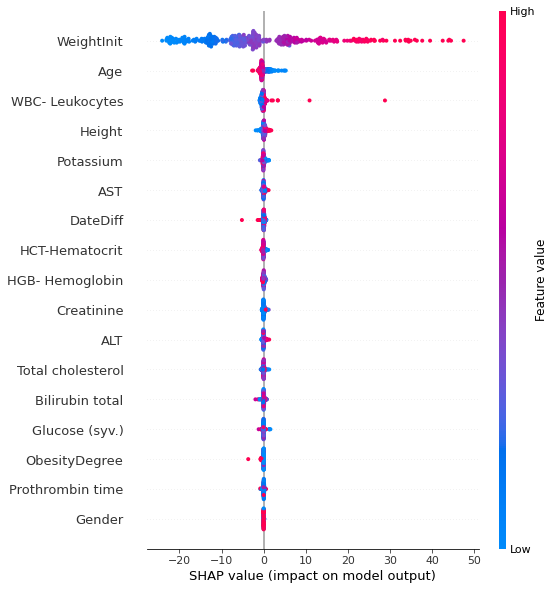

In [45]:
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

In [84]:
# remove WeightInit
X_ = data[['Height', 'DateDiff', 'ObesityDegree', 'Age',
       'Gender', 'Prothrombin time', 'Bilirubin total', 'Creatinine',
       'Total cholesterol', 'Glucose (syv.)', 'Potassium', 'AST', 'ALT',
       'WBC- Leukocytes', 'HGB- Hemoglobin', 'HCT-Hematocrit']]


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_, y, test_size=0.3, random_state=0)

In [86]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [87]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_rid),
        mean_squared_error(y_test, y_test_pred_rid)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_rid),
        r2_score(y_test, y_test_pred_rid)))

MSE train: 31.489, test: 42.089
R^2 train: 0.877, test: 0.825


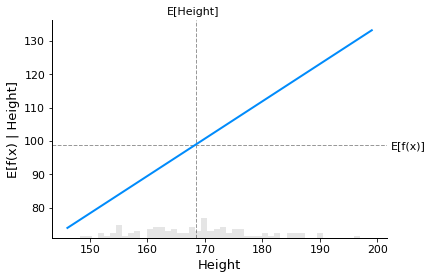

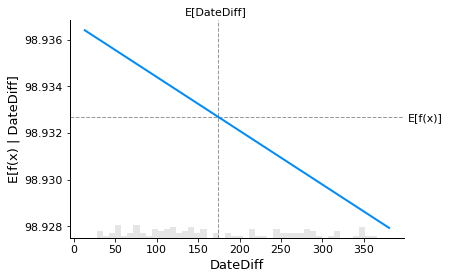

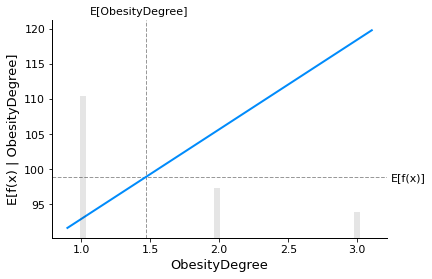

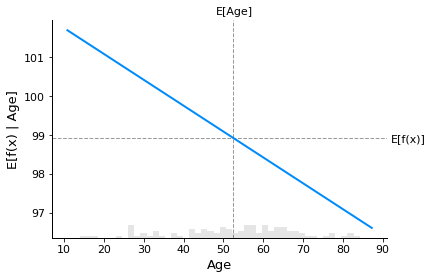

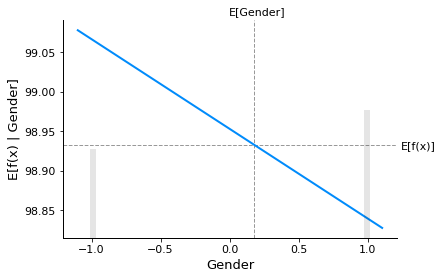

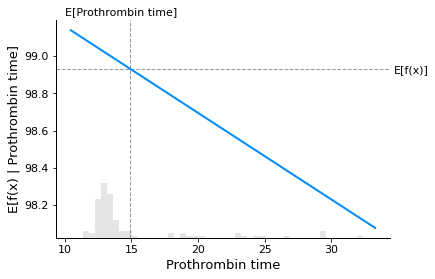

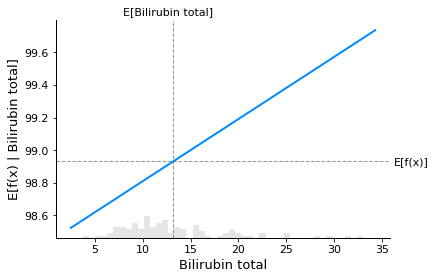

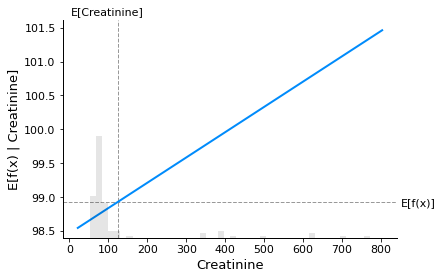

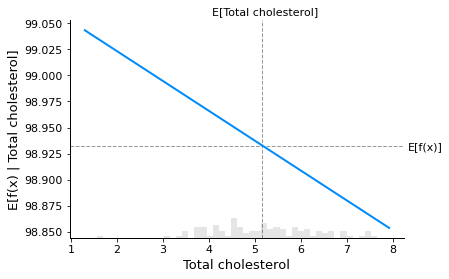

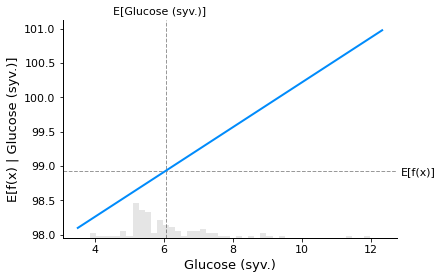

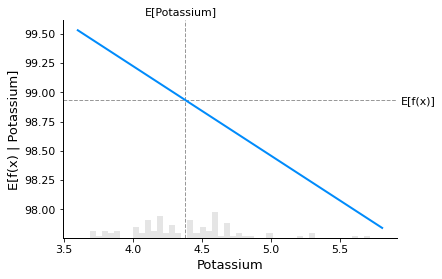

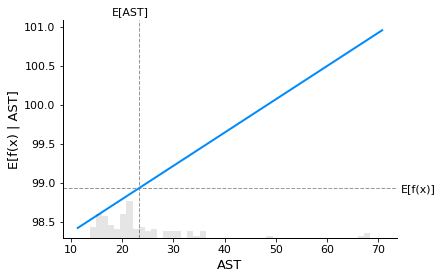

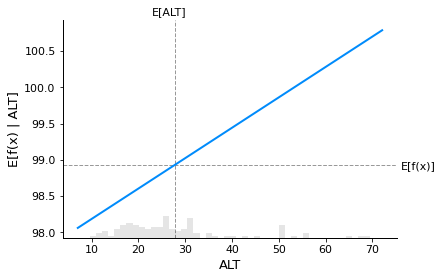

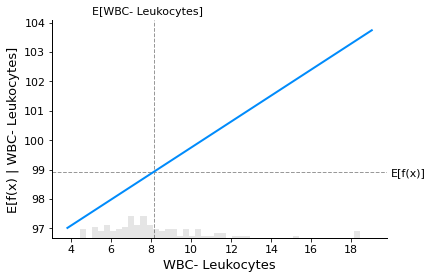

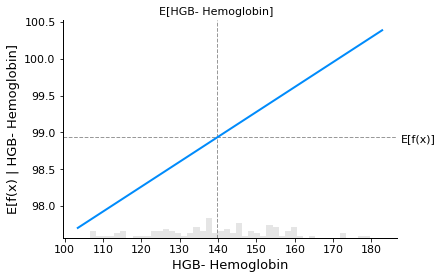

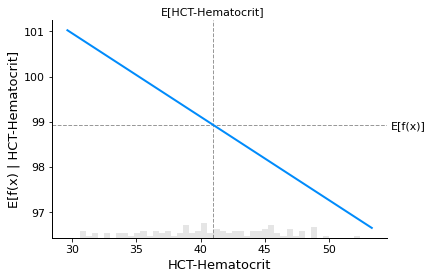

In [88]:
X100 = shap.utils.sample(X_, 100) # 100 instances for use as the background distribution
for col in X_.columns:
    shap.partial_dependence_plot(
        col, slr.predict, X100, ice=False,
        model_expected_value=True, feature_expected_value=True
    )

Permutation explainer: 543it [00:34, 10.86it/s]                                 


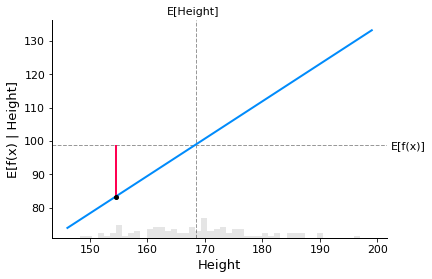

In [90]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(slr.predict, X100)
shap_values = explainer(X_)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "Height", slr.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

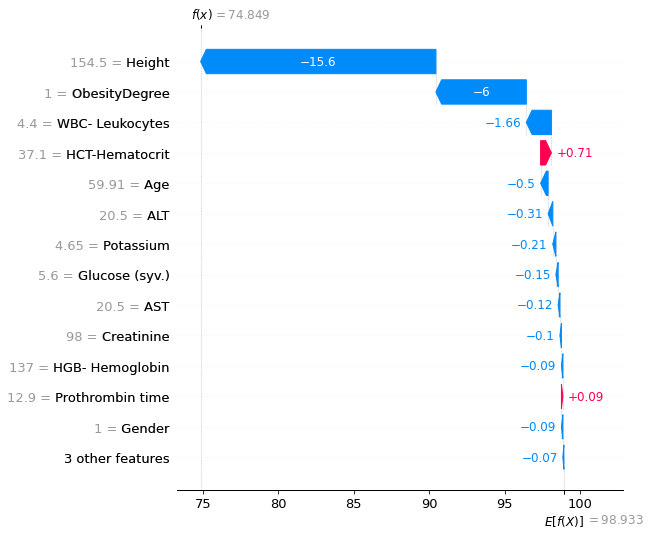

In [91]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

### Linear Regression

In [23]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", slr.coef_[i].round(5))

Model coefficients:

WeightInit = 0.74103
Height = 0.2874
DateDiff = -0.00131
ObesityDegree = 2.40825
Age = -0.09532
Gender = 0.22565
Prothrombin time = 0.00204
Bilirubin total = 0.04946
Creatinine = 0.00366
Total cholesterol = 0.07696
Glucose (syv.) = -0.13062
Potassium = -0.97641
AST = 0.0701
ALT = -0.01263
WBC- Leukocytes = 0.40934
HGB- Hemoglobin = -0.02093
HCT-Hematocrit = 0.02107


In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

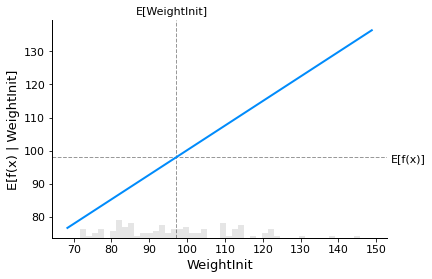

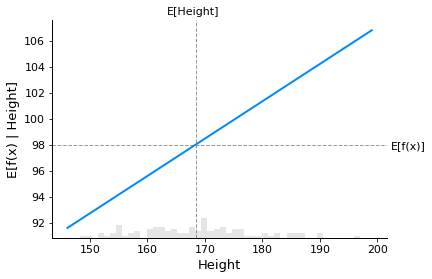

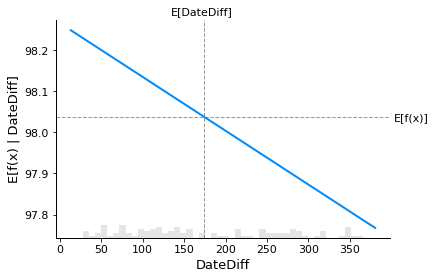

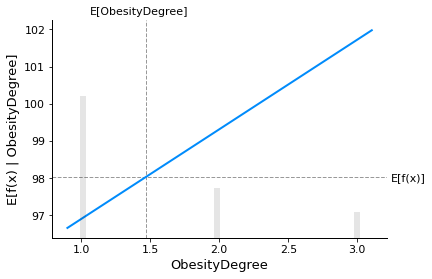

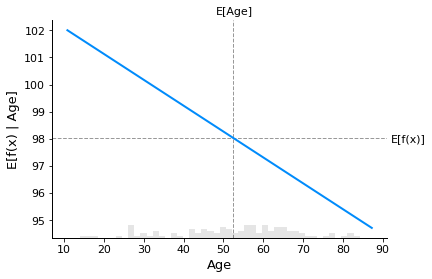

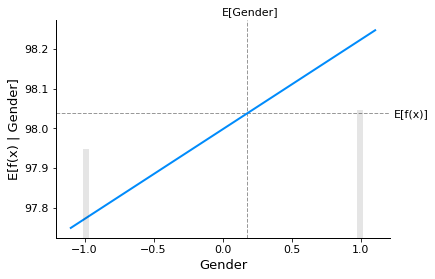

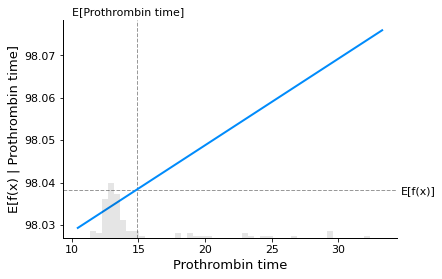

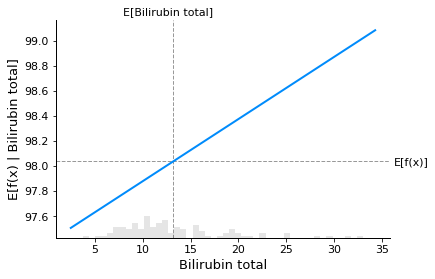

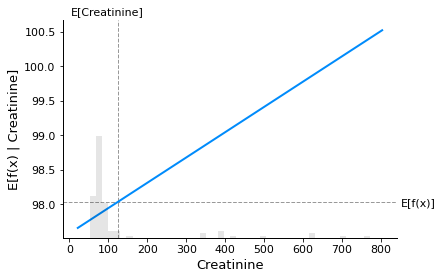

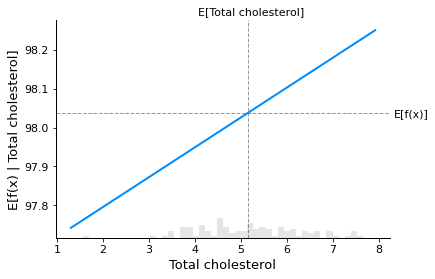

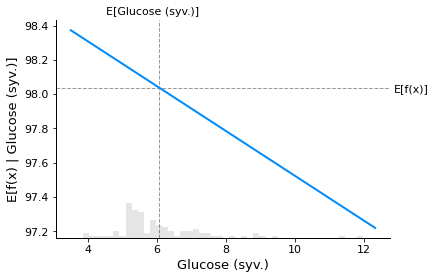

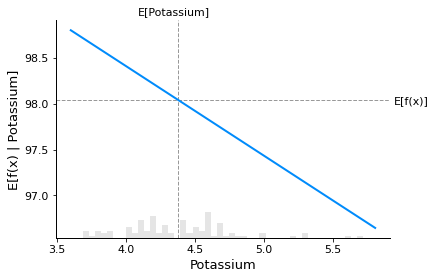

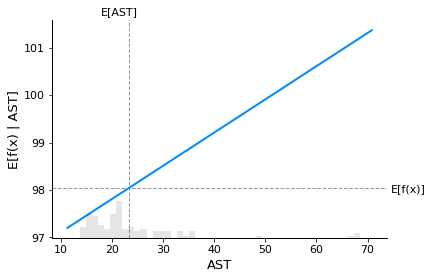

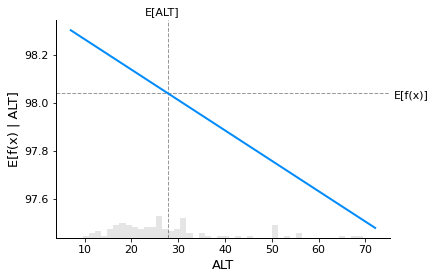

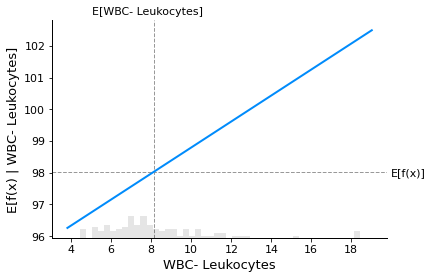

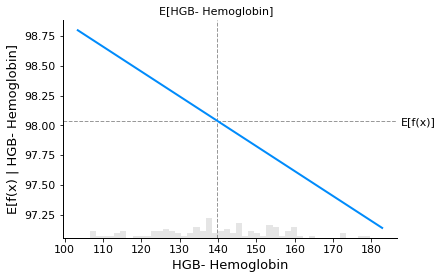

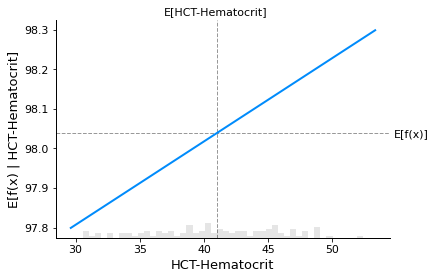

In [28]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
for col in X.columns:
    shap.partial_dependence_plot(
        col, slr.predict, X100, ice=False,
        model_expected_value=True, feature_expected_value=True
    )

Permutation explainer: 543it [00:33, 11.03it/s]                                 


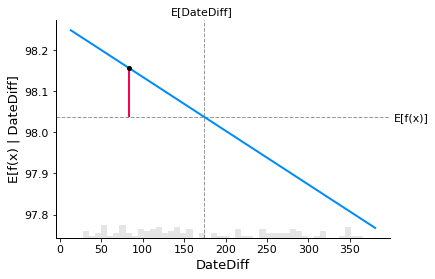

In [81]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(slr.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "DateDiff", slr.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

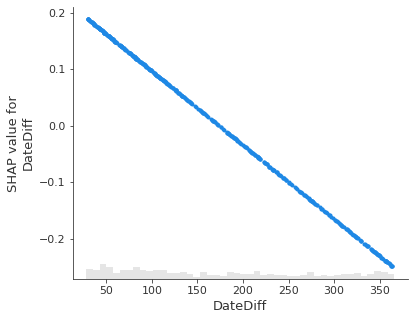

In [82]:
shap.plots.scatter(shap_values[:,"DateDiff"])

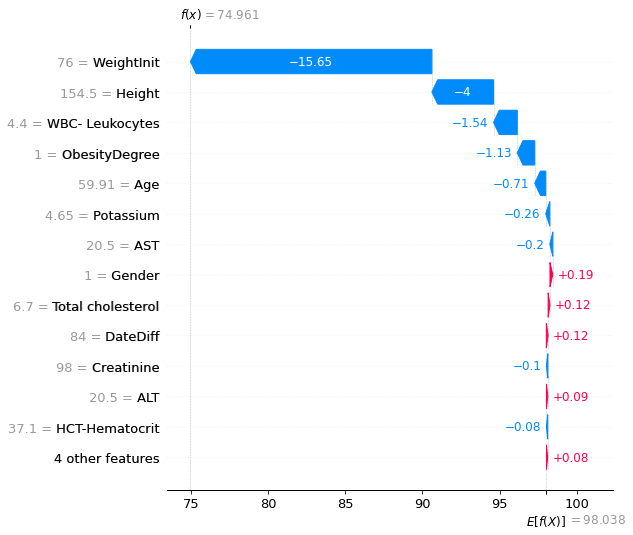

In [83]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)